# D-REX (exp. 1)

In [1]:
from cmme.idyom import *
from cmme.ppmdecay import *
from cmme.drex import *

In [2]:

# changepoint 30. delta_beta = 2.5, direction = 0.
input_sequence = [-11, -6, 9, -3, -7, 4, 6, -1, -3, 4, 9, -14, -8, -8, -7, 2, 4, 3, 0, -7, 8, 2, -4, -15, -10, 7, 9, -9, 3, -4, -16, -15, -11, -8, -7, -8, -9, -9, -7, -4, -1, -1, 0, 1, 2, 1, -2, -5, -5, -2, 0, -1, -3, -1, 1, 2, 3, 4, 7, 8]

prior_input_sequence = [-17, -16, 0, 1, 2, 5, 16, 17]
prior_D = 3
prior = UnprocessedPrior(DistributionType.GAUSSIAN, prior_input_sequence, prior_D)

alphabet_levels = sorted(set(input_sequence))

print("Input sequence:", input_sequence)
print("Length of input sequence:", len(input_sequence))
print()
print("DREX: Prior input sequence:", prior_input_sequence)
print("DREX: Prior D:", prior_D)
print("DREX: Prior distribution:", prior.__dict__)
print()
print("PPM: Alphabet levels:", alphabet_levels)

Input sequence: [-11, -6, 9, -3, -7, 4, 6, -1, -3, 4, 9, -14, -8, -8, -7, 2, 4, 3, 0, -7, 8, 2, -4, -15, -10, 7, 9, -9, 3, -4, -16, -15, -11, -8, -7, -8, -9, -9, -7, -4, -1, -1, 0, 1, 2, 1, -2, -5, -5, -2, 0, -1, -3, -1, 1, 2, 3, 4, 7, 8]
Length of input sequence: 60

DREX: Prior input sequence: [-17, -16, 0, 1, 2, 5, 16, 17]
DREX: Prior D: 3
DREX: Prior distribution: {'_D': 3, '_feature_count': 1, '_trials_count': 1, '_distribution': <DistributionType.GAUSSIAN: 'gaussian'>, 'prior_input_sequence': array([[[-17.0],
        [-16.0],
        [0.0],
        [1.0],
        [2.0],
        [5.0],
        [16.0],
        [17.0]]], dtype=object)}

PPM: Alphabet levels: [-16, -15, -14, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 6, 7, 8, 9]


# PPM

In [3]:
input_time_sequence = list(range(0, len(input_sequence)))

ppm_ib = PPMDecayInstructionBuilder()
ppm_ib.alphabet_levels(alphabet_levels).input_sequence(input_sequence, input_time_sequence)

ppm_if = ppm_ib.to_instructions_file()

ppm_model = PPMModel()

ppm_rf = ppm_model.run_instructions_file(ppm_if)

Instructions file written to /var/folders/lx/_yl9nwrs681dpnp5jrv9n6s00000gn/T/tmpj0ntkyki


# D-REX

In [4]:
drex_ib = DREXInstructionBuilder()
drex_ib.prior(prior).input_sequence(input_sequence)

drex_if = drex_ib.to_instructions_file()

drex_model = DREXModel()

drex_rf = drex_model.run_instructions_file(drex_if)

Instructions file written to /var/folders/lx/_yl9nwrs681dpnp5jrv9n6s00000gn/T/tmpaue_485j


# Plot

In [5]:
from cmme.archive.visualization import DataFrame, MatlabPlot

data_frame = DataFrame(ppm_rf, drex_rf, input_sequence)

In [6]:
mp = MatlabPlot(data_frame)
# or:
#mp = MatplotlibPlot(data_frame)

Instructions file path set to /var/folders/lx/_yl9nwrs681dpnp5jrv9n6s00000gn/T/tmpgzjcgjn6
Plot output file path set to /var/folders/lx/_yl9nwrs681dpnp5jrv9n6s00000gn/T/tmpbtrh6ofa
Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-8f36f75a-6431-4e5a-89d4-d32f4856572d
Send 'exit' command to kill the server
.....MATLAB started and connected!


2023-09-13 13:13:34.598 MATLAB[37052:1403117] CoreText note: Client requested name ".SFNS-Regular", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2023-09-13 13:13:34.598 MATLAB[37052:1403117] CoreText note: Set a breakpoint on CTFontLogSystemFontNameRequest to debug.
2023-09-13 13:13:34.603 MATLAB[37052:1403117] CoreText note: Client requested name ".SFNS-Bold", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2023-09-13 13:13:34.609 MATLAB[37052:1403117] CoreText note: Client requested name ".SFNS-Regular", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2023-09-13 13:

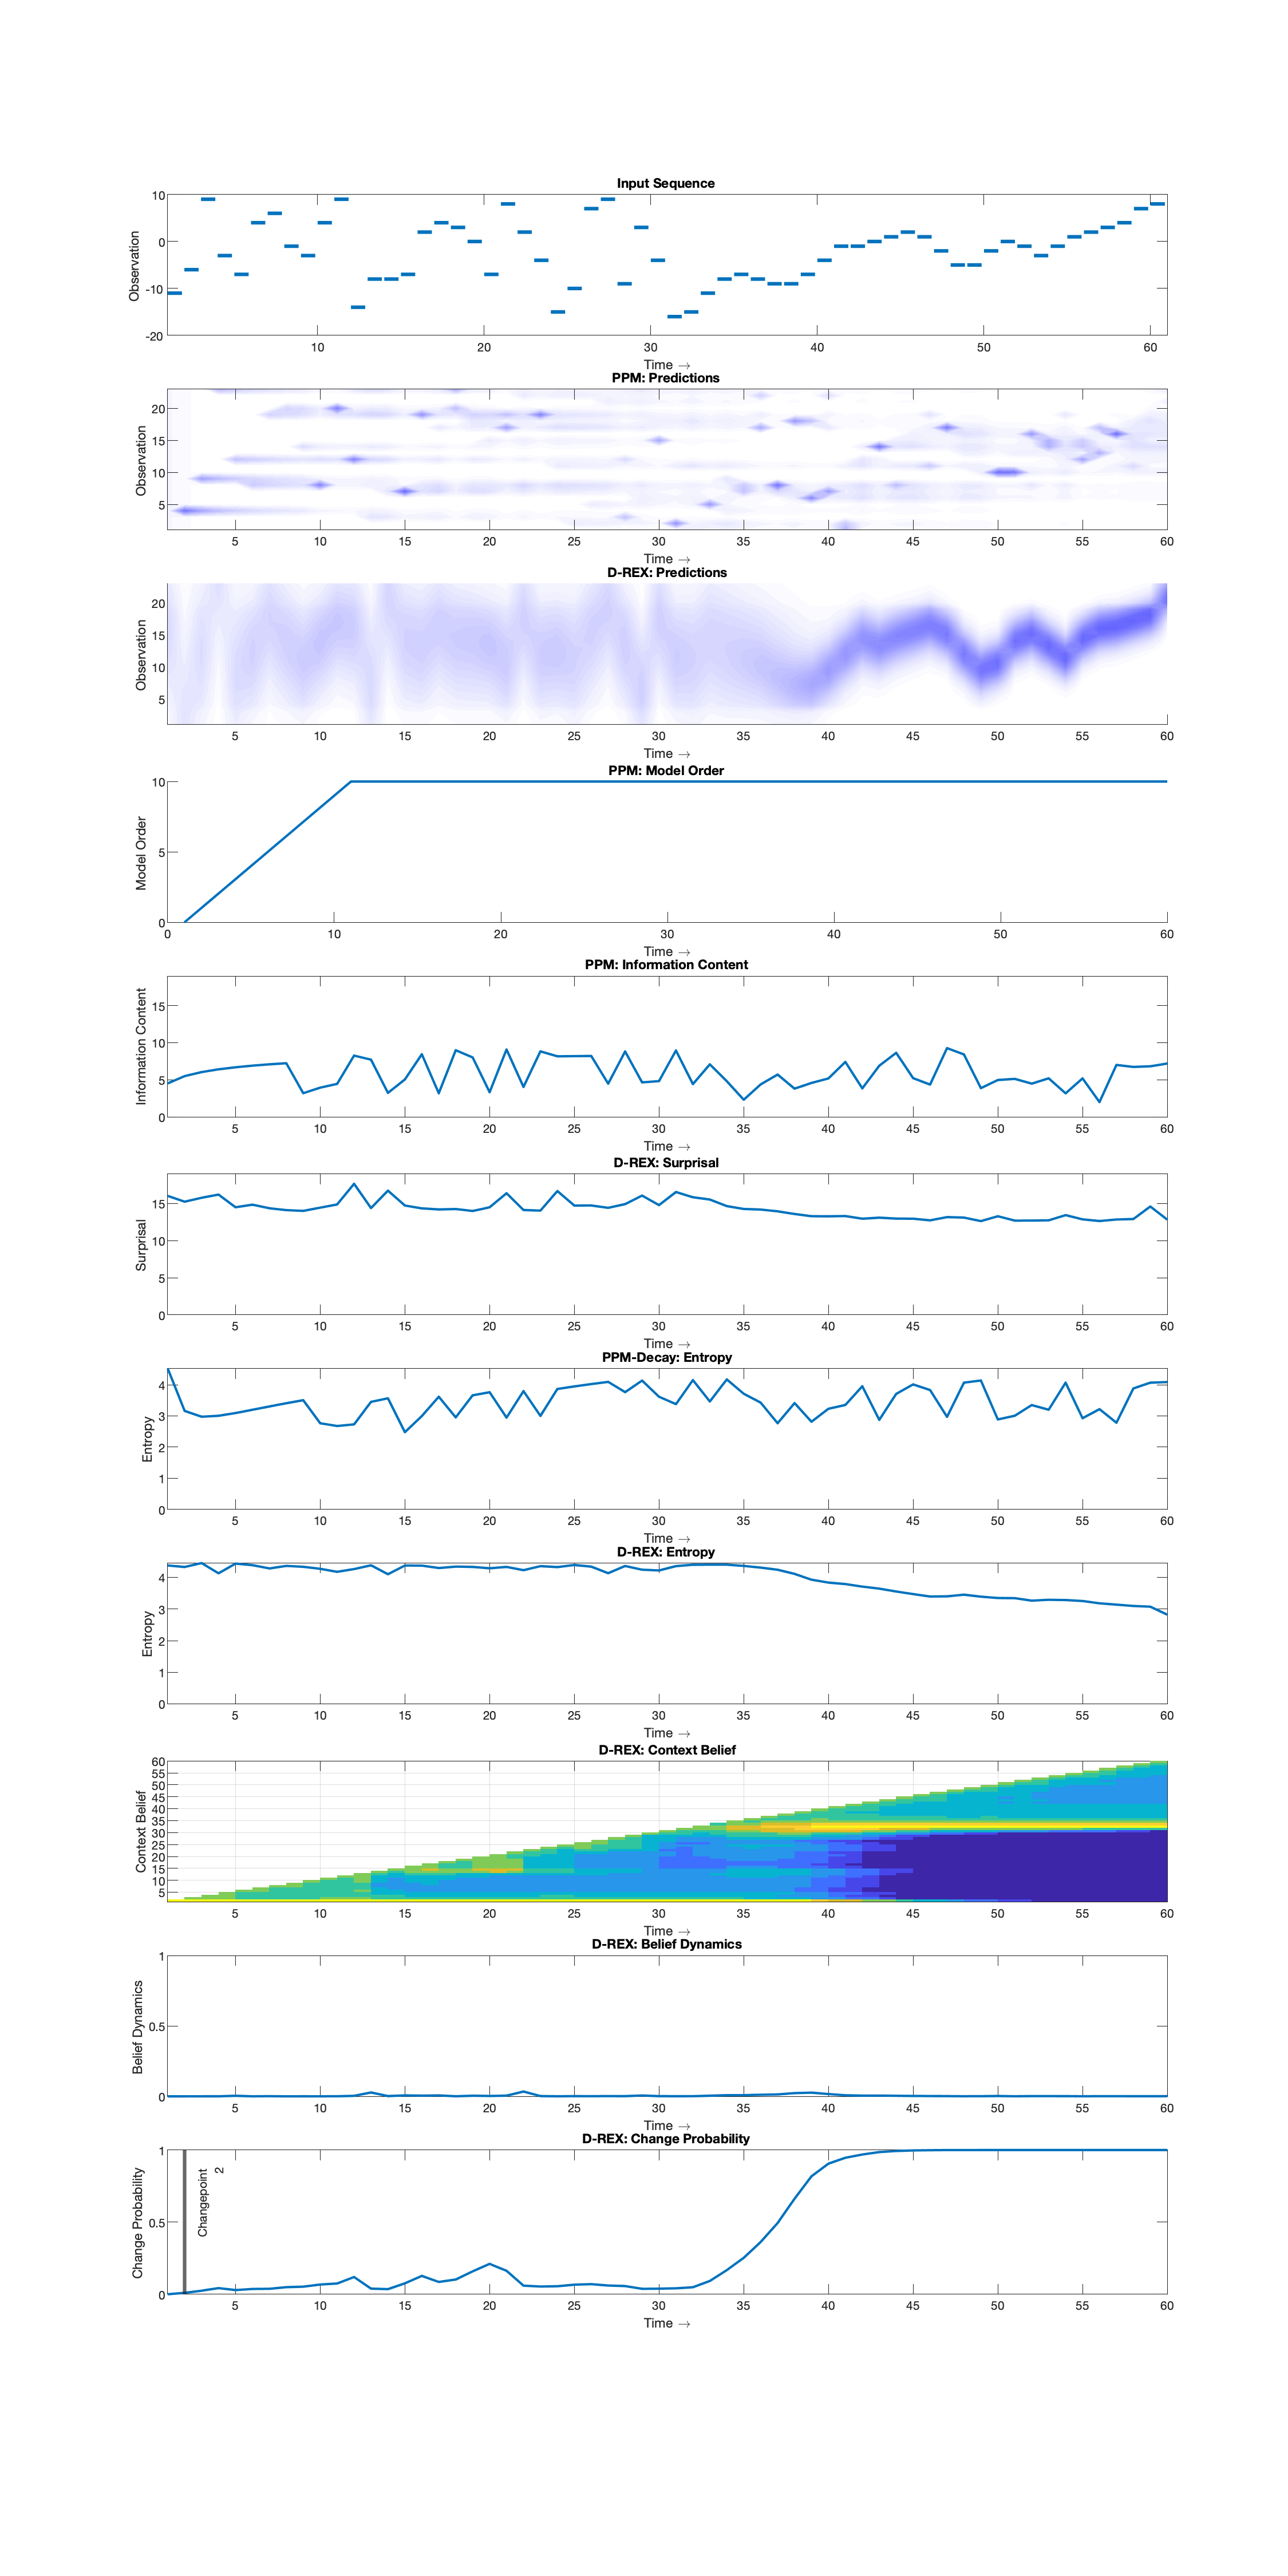

In [7]:
mop_figures = mp.plot()

from IPython.display import Image
for f in mop_figures:
    display(Image(filename=f))